****CLASSIFICATION of CREDIT CARD CUSTOMERS with the K-MEANS CLUSTERING****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

* Import Data 

In [2]:
df= pd.read_csv('../input/ccdata/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df=df.drop(['CUST_ID'], axis=1)

In [5]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
X = imputer.fit_transform(X) 

df['MINIMUM_PAYMENTS_NEW'] = X

In [7]:
X2 = df['CREDIT_LIMIT'].values.reshape(-1,1)
X2 = imputer.fit_transform(X2) 

df['CREDIT_LIMIT_NEW'] = X2

In [8]:
df = df.drop(['CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)

In [9]:
df.isnull().sum().sum()

0

* Data Visualization

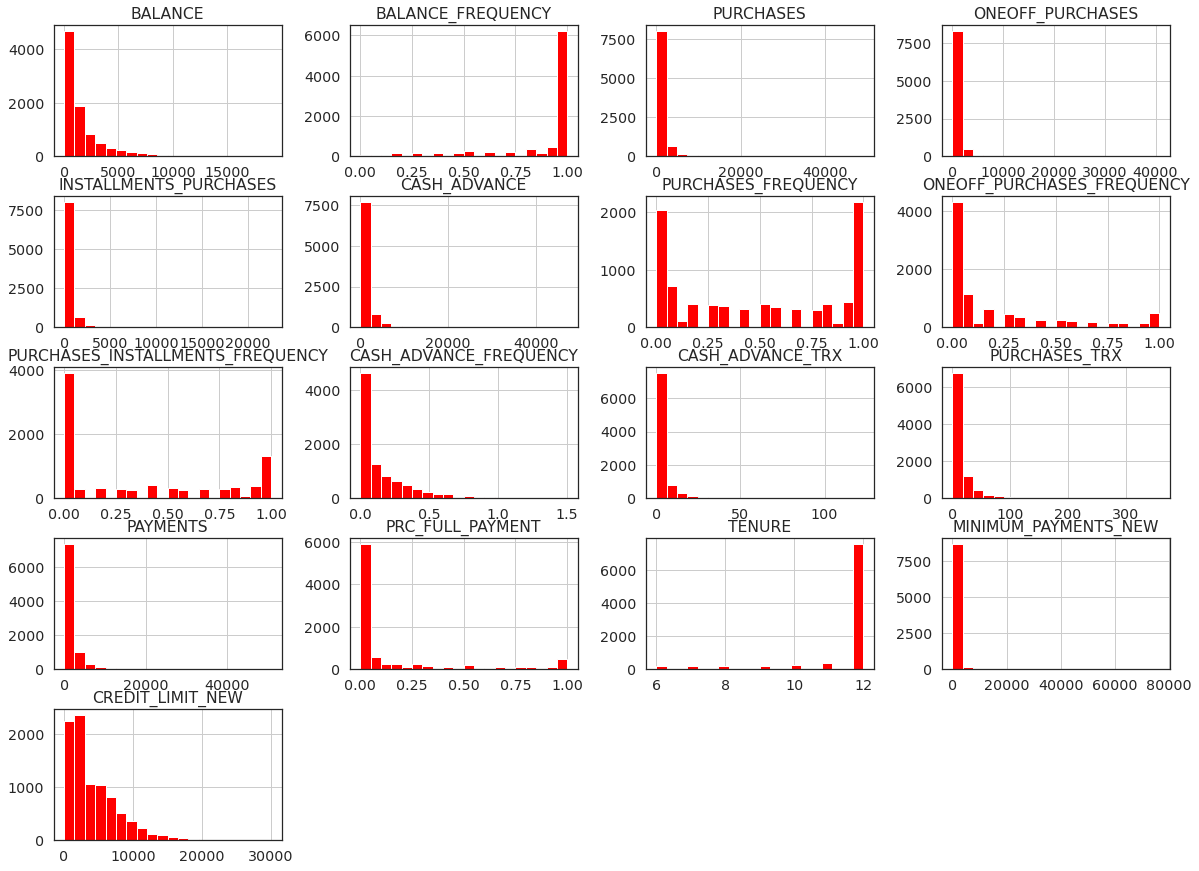

In [10]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,15)})
ax=df.hist(bins=20,color='red' )

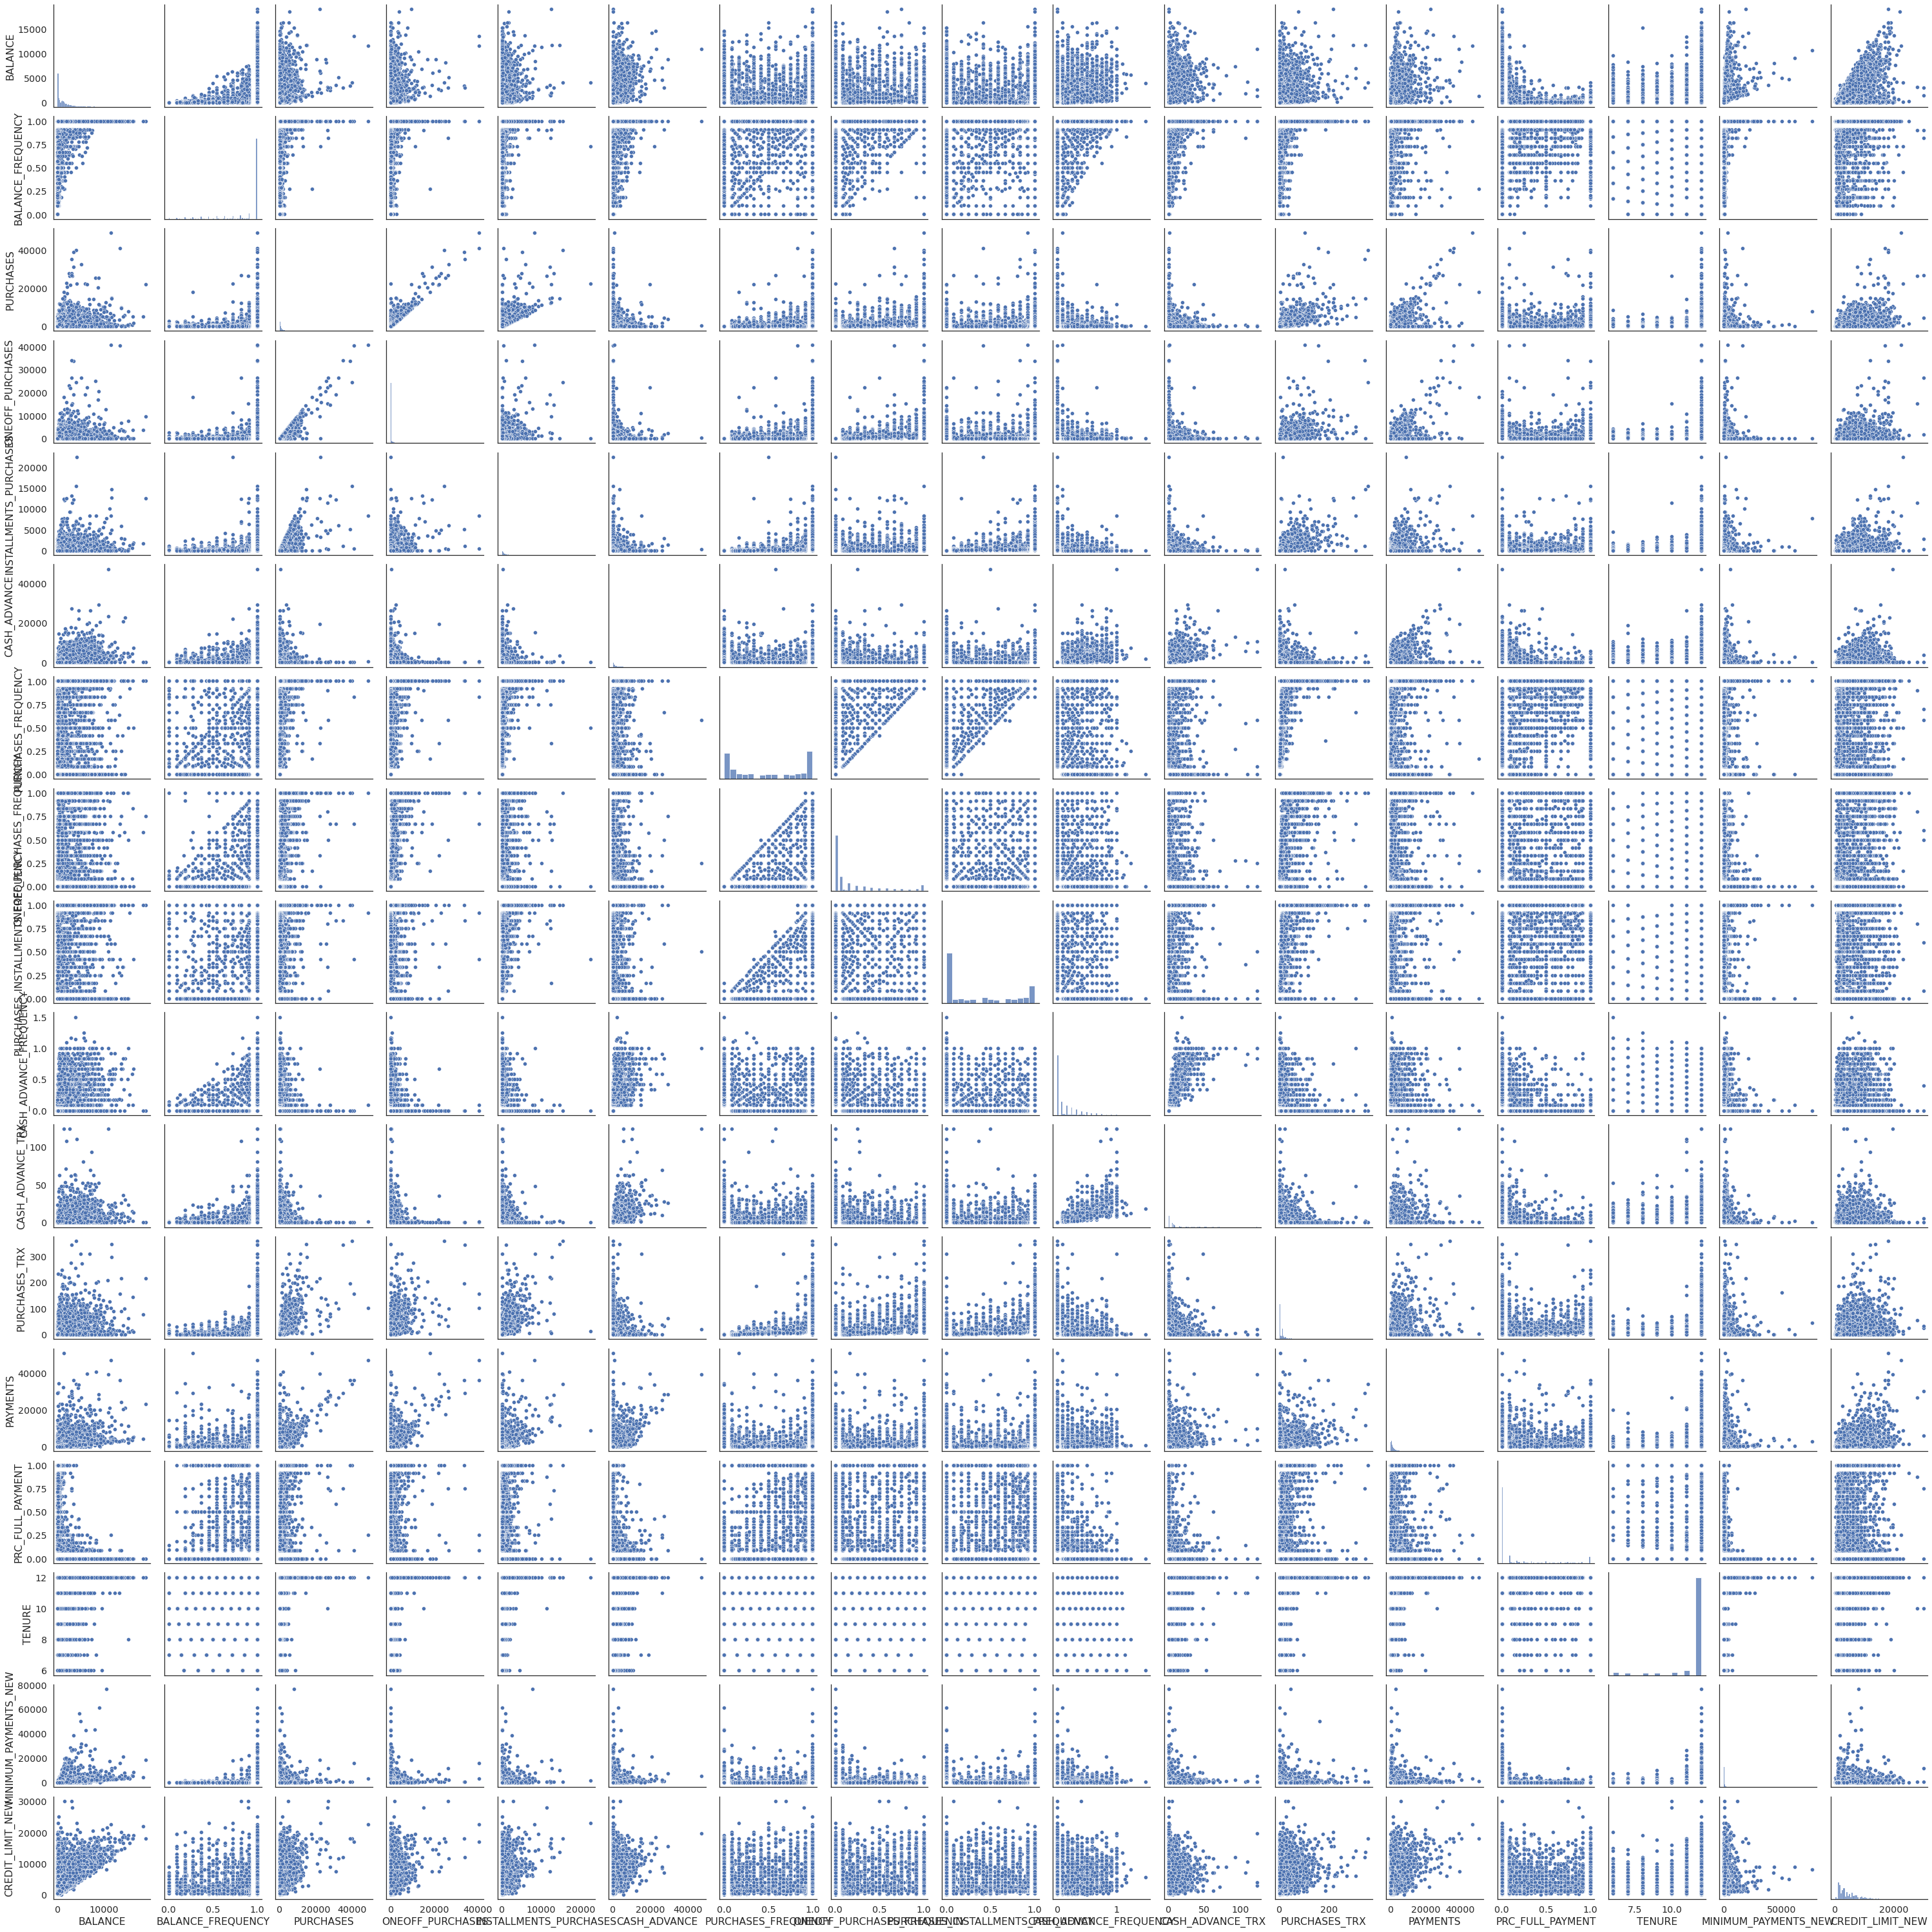

In [11]:
sns.pairplot(df)
plt.show()

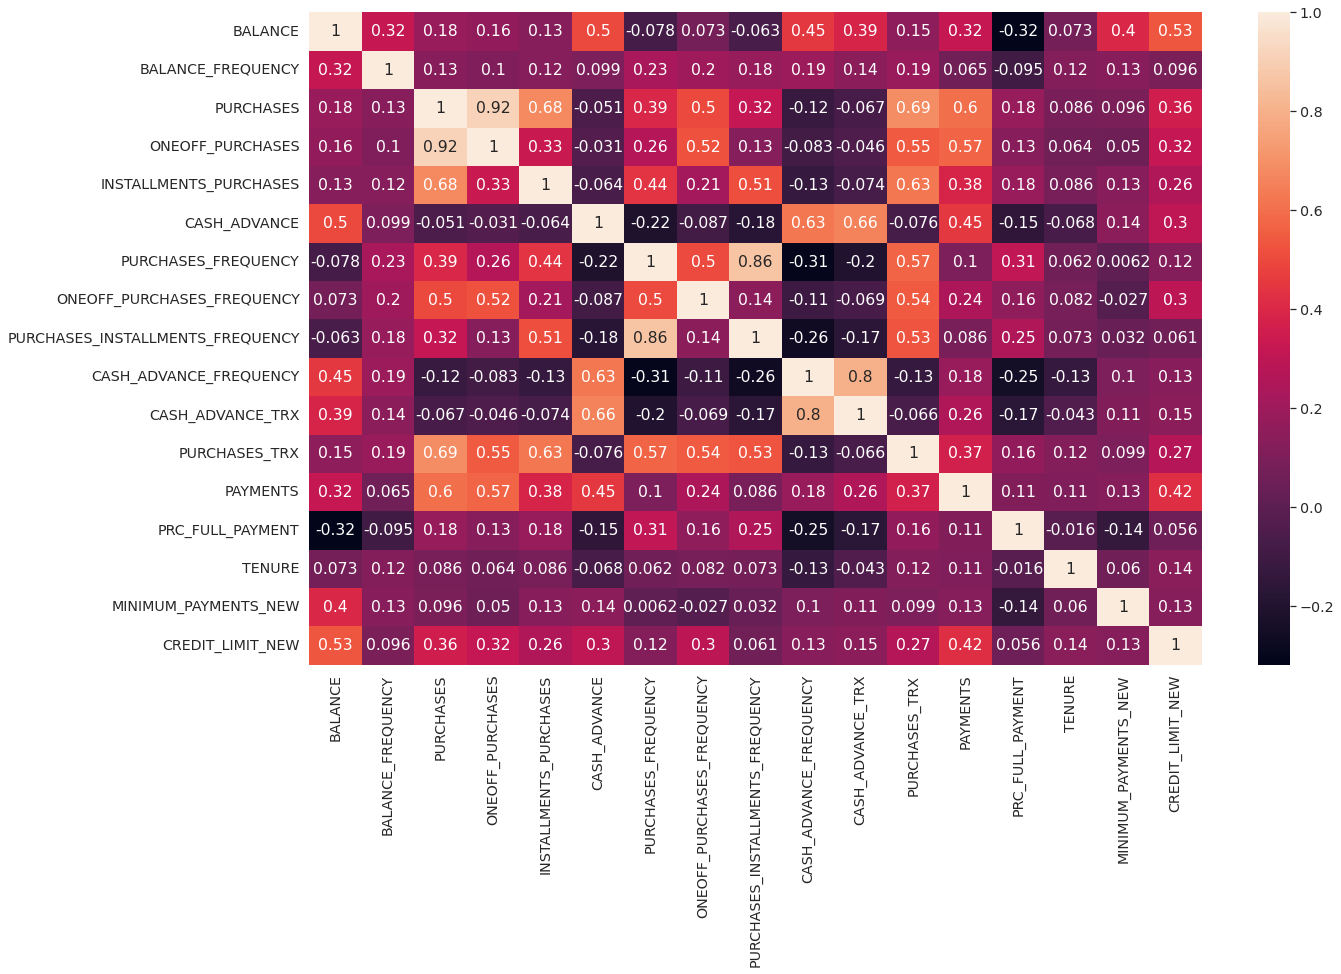

In [12]:
plt.figure(figsize=(20,12))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

* Data Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df=sc.fit_transform(df)

* Silhouette Method whitout PCA

In [14]:
from tqdm import tqdm
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
silhouette = {}
for i in tqdm(range(2,19)):
    kmeans =cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(df)
    silhouette[i] = silhouette_score(df, kmeans.labels_, metric='euclidean')

100%|██████████| 17/17 [03:51<00:00, 13.62s/it]


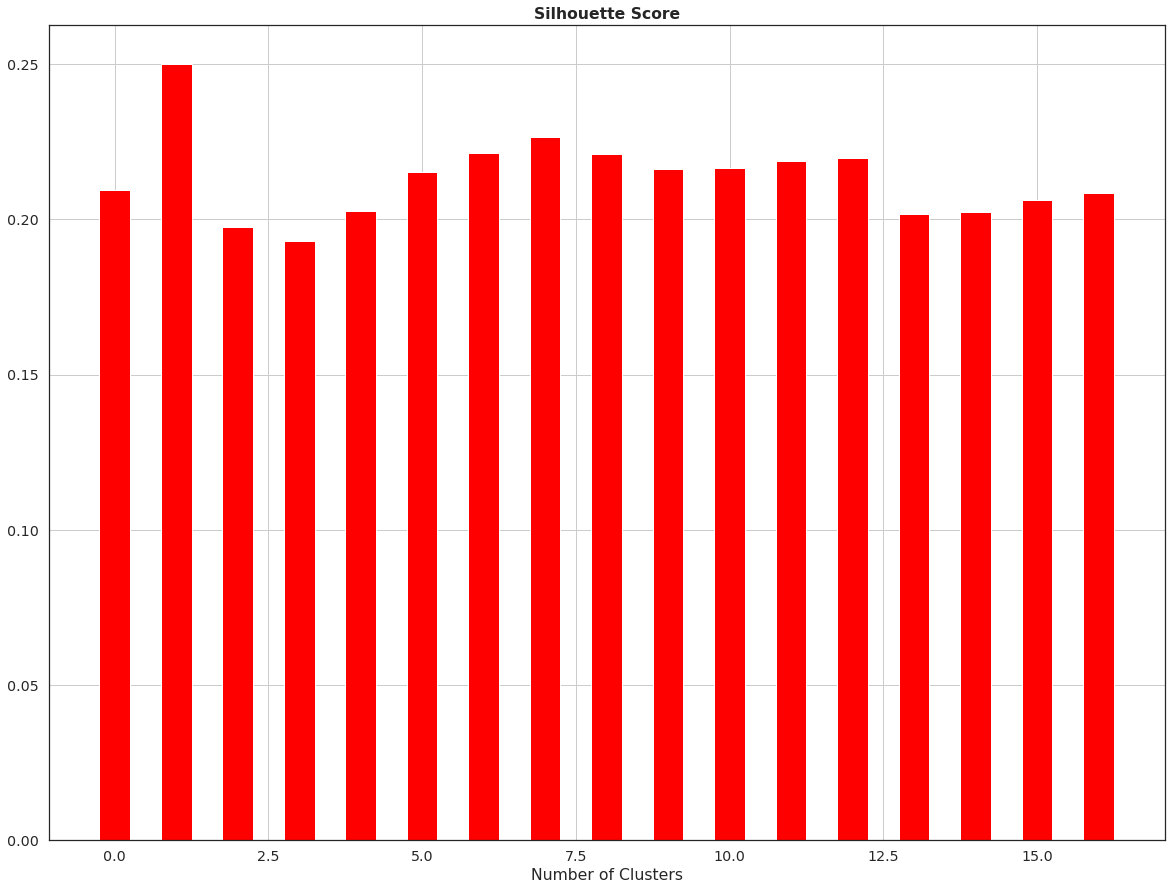

In [15]:
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

* PCA

Data represented by the 2 strongest principal components


In [16]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(df)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 47.61%


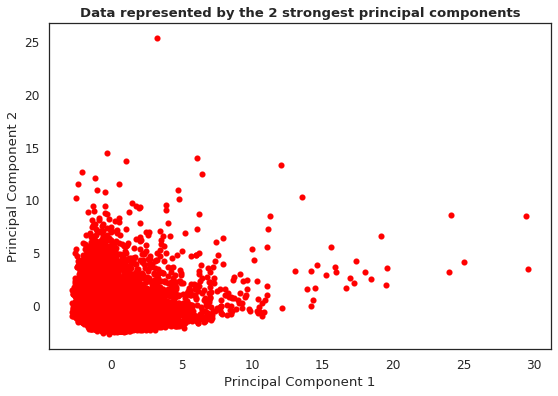

In [17]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

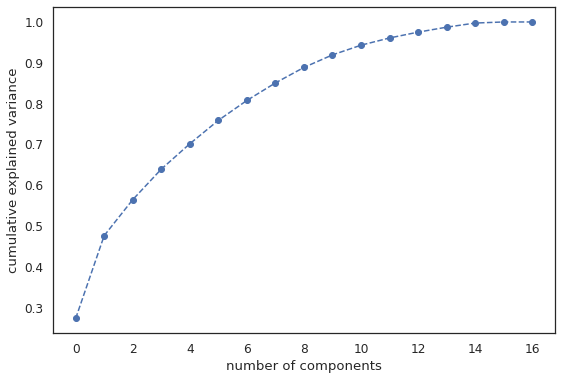

In [18]:
pca=PCA(whiten=True).fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o',linestyle='--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [19]:
pca_10 = PCA(10)
pca_10_result = pca_10.fit_transform(df)

print ('Cumulative variance explained by 10 principal components: {:.2%}'.format(np.sum(pca_10.explained_variance_ratio_)))

Cumulative variance explained by 10 principal components: 91.93%


Finally, we must write the relevant code to keep only 10 components.

In [20]:
pca10=PCA(n_components=10)

In [21]:
scores_pca=pca10.fit_transform(df)

In [22]:
scores_pca

array([[-1.68364879e+00, -1.07224148e+00,  4.75660084e-01, ...,
        -1.89517812e-02,  1.18335937e-01, -7.81956004e-02],
       [-1.13408493e+00,  2.50914981e+00,  6.02216308e-01, ...,
         1.76153547e-01,  6.74472271e-01, -7.77929470e-01],
       [ 9.69394988e-01, -3.83576903e-01,  9.09697616e-02, ...,
        -2.29364329e-01, -8.67802735e-01, -1.74404835e-03],
       ...,
       [-9.28985122e-01, -1.80804835e+00, -4.58242377e-01, ...,
        -2.92831922e-01,  8.10029122e-01, -8.30135631e-01],
       [-2.33784475e+00, -6.53611332e-01,  9.82831153e-01, ...,
         2.30862515e-01,  1.20567473e+00,  2.68662638e-01],
       [-5.58026533e-01, -4.00646098e-01,  1.03364560e+00, ...,
        -4.04444715e-01, -8.31975961e-01,  3.46160674e-01]])

* Elbow Method with PCA

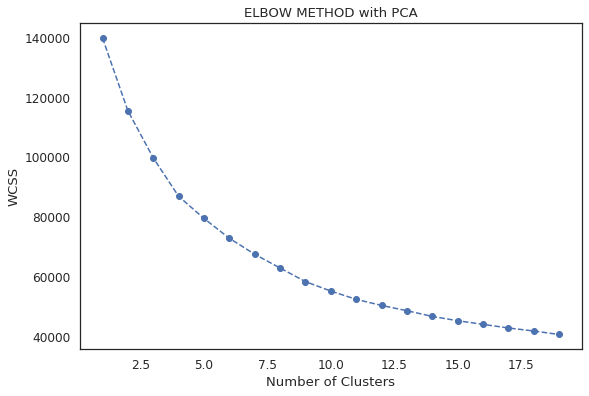

In [23]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20), wcss,marker='o',linestyle='--')
plt.title('ELBOW METHOD with PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

As we can see, in K=5 all the metrics indicates that it is the best clusters number. So, we'll be using it

* K-Means Clustering

In [24]:
kmeans_pca = cluster.KMeans(n_clusters=5,random_state=17,init='k-means++')
y_kmeans = kmeans_pca.fit(scores_pca)


In [25]:
y_kmeans

KMeans(n_clusters=5, random_state=17)

In [26]:
kmeans_labels = kmeans_pca.fit_predict(scores_pca)
pd.Series(kmeans_labels).value_counts()

1    3936
2    2432
0    1378
3    1118
4      86
dtype: int64

* K-Means Clustering with PCA Result

In [27]:
df=pd.DataFrame(df)

In [28]:
df_segm_pca_kmeans=pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-10: ]=['100','101','102','103','104','105','106','107','108','109']

In [29]:
df_segm_pca_kmeans['cluster K-Means PCA']=kmeans_pca.labels_

In [30]:
df_segm_pca_kmeans.head(10)

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,cluster K-Means PCA
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,...,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,-0.018952,0.118336,-0.078196,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,...,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,0.176154,0.674472,-0.777929,3
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,...,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,-0.229364,-0.867803,-0.001744,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,...,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,-0.690410,-0.064245,0.393690,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,...,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0.245311,0.578032,-0.122073,1
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,...,-0.776378,-1.149597,0.814987,0.826829,0.426485,0.777943,0.062261,0.447065,-0.210587,2
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,...,-0.704560,2.090422,-0.767042,-1.076941,-1.067958,-1.396153,1.146328,0.247923,-0.087832,0
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,...,-1.288145,-1.830085,0.186117,0.182078,-0.065654,0.420092,-0.531586,0.134970,-0.963048,2
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,...,-0.459496,0.178103,1.031193,-0.226924,-0.301863,-0.090198,-0.423516,0.720167,-0.093488,1
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,...,-0.366721,1.943200,0.993613,0.404646,-0.637191,-0.766981,-1.066420,-0.285995,0.268001,1


In [31]:
df_segm_pca_kmeans['cluster']=df_segm_pca_kmeans['cluster K-Means PCA'].map({0:'first',
                                                                             1:'second',
                                                                             2:'third',
                                                                             3:'fourth',
                                                                             4:'fifth'})

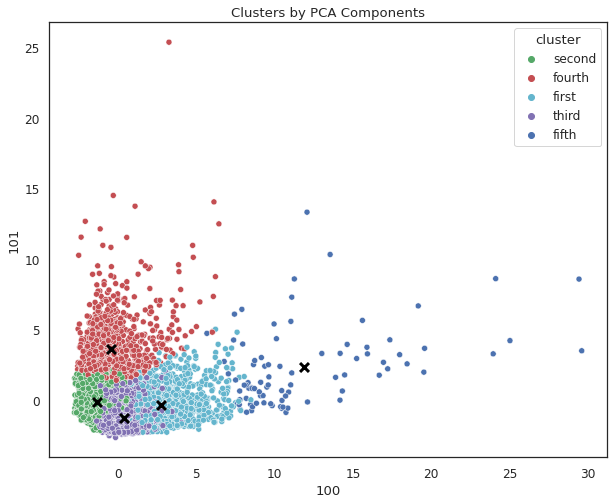

In [32]:
x_axis=df_segm_pca_kmeans[100]
y_axis=df_segm_pca_kmeans[101]
plt.figure(figsize=(10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['cluster'], palette=['g','r','c','m','b'])
centers_pca= kmeans_pca.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            marker='x', s=80, linewidths=4,
            color='black', zorder=10,lw=3)
plt.title('Clusters by PCA Components')
plt.show()